In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def simulate_management(w=0, x=20, b=100, b_exp=50, c=-10, n=10, adapt=False):    
    # creating the pandas DataFrame
    index = pd.Index(range(n))
    columns = pd.Index(['w', 'x', 'y', 'y_exp', 'U', 'U_exp', 'b_exp'])
    data = pd.DataFrame(index=index, columns=columns)

    for t in range(n):
        # saving variables
        data['w'][t] = w
        data['x'][t] = x
        data['b_exp'][t] = b_exp
        
        # production and expected production
        data['y'][t] = -(x**2) + b*x + c
        data['y_exp'][t] = -(x**2) + b_exp*x
        
        # Utility and expected utility
        data['U'][t] = data['y'][t] + w*x
        data['U_exp'][t] = data['y_exp'][t] + w*x
        
        # updating for next round
        if x != 0: #avoid division by zero
            b_exp = data['y'][t]/x + x
        
        if adapt and t > 0: # For adaptive utility
            w = (data['x'][t]-data['x'][t-1]) / abs(data['x'][t]) \
                * ((data['U'][t] - data['U_exp'][t]) / data['x'][t]) \
                + w
        x = (b_exp+w)/2
    
    # save data from last cycle
    data['w'][t] = w # how the heck did that work? 
    data['x'][t] = x
    data['b_exp'][t] = b_exp
    
        #data.append(pd.Series([w, x, b_ex, y, y_ex, U, U_ex]), ignore_index=True)
    return data

In [25]:
simulate_management()

,w,x,y,y_exp,U,U_exp,b_exp
0,0,20,1590,600,1590,600,50
1,0,49.75,2489.94,2475.06,2489.94,2475.06,99.5
2,0,49.8995,2489.99,2489.96,2489.99,2489.96,99.799
3,0,49.8998,2489.99,2489.99,2489.99,2489.99,99.7996
4,0,49.8998,2489.99,2489.99,2489.99,2489.99,99.7996
5,0,49.8998,2489.99,2489.99,2489.99,2489.99,99.7996
6,0,49.8998,2489.99,2489.99,2489.99,2489.99,99.7996
7,0,49.8998,2489.99,2489.99,2489.99,2489.99,99.7996
8,0,49.8998,2489.99,2489.99,2489.99,2489.99,99.7996
9,0,49.8998,2489.99,2489.99,2489.99,2489.99,99.7996


In [26]:
simulate_management(adapt=True)

,w,x,y,y_exp,U,U_exp,b_exp
0,0,20,1590,600,1590,600,50
1,0,49.75,2489.94,2475.06,2489.94,2475.06,99.5
2,0.178796,49.9889,2490,2489.95,2498.94,2498.89,99.799
3,0.178801,49.9894,2490,2490,2498.94,2498.94,99.8
4,0.178801,49.9894,2490,2490,2498.94,2498.94,99.8
5,0.178801,49.9894,2490,2490,2498.94,2498.94,99.8
6,0.178801,49.9894,2490,2490,2498.94,2498.94,99.8
7,0.178801,49.9894,2490,2490,2498.94,2498.94,99.8
8,0.178801,49.9894,2490,2490,2498.94,2498.94,99.8
9,0.178801,49.9894,2490,2490,2498.94,2498.94,99.8


In [27]:
simulate_management(c=-1000)

,w,x,y,y_exp,U,U_exp,b_exp
0,0,20,600,600,600,600,50
1,0,25,875,625,875,625,50
2,0,30,1100,900,1100,900,60
3,0,33.3333,1222.22,1111.11,1222.22,1111.11,66.6667
4,0,35,1275,1225,1275,1225,70
5,0,35.7143,1295.92,1275.51,1295.92,1275.51,71.4286
6,0,36,1304,1296,1304,1296,72
7,0,36.1111,1307.1,1304.01,1307.1,1304.01,72.2222
8,0,36.1538,1308.28,1307.1,1308.28,1307.1,72.3077
9,0,36.1765,1308.74,1308.28,1308.74,1308.28,72.3529


In [28]:
simulate_management(c=-1000, adapt=True)

,w,x,y,y_exp,U,U_exp,b_exp
0,0,20,600,600,600,600,50
1,0,25,875,625,875,625,50
2,2,31,1139,899,1201,961,60
3,3.49844,35.6202,1293.22,1144.18,1417.84,1268.8,67.7419
4,4.04115,37.9836,1355.61,1289.26,1509.1,1442.75,71.926
5,4.14983,38.9113,1377.04,1352.62,1538.52,1514.09,73.6728
6,4.1648,39.2327,1384.06,1375.81,1547.46,1539.2,74.3005
7,4.16653,39.3388,1386.34,1383.63,1550.24,1547.54,74.511
8,4.16671,39.3733,1387.07,1386.2,1551.13,1550.25,74.5798
9,4.16673,39.388,1387.31,1387.03,1551.41,1551.13,74.6092


In [29]:
def extract_y_info(w=0, x=20, b=100, b_exp=50, c=-10, n=10, adapt=False):
    data = simulate_management(w, x, b, b_exp, c, n, adapt)
    return data['y'][n-1]

In [30]:
def compare_viz():
    fig, ax = plt.subplots()
    ind = np.arange(10)
    width = 0.35
    
    static_values = []
    adapt_values = []
    
    for c in range(0, -1000, -100):
        static_values.append(extract_y_info(c=c))
        adapt_values.append(extract_y_info(c=c, adapt=True))
    
    rects_static = ax.bar(ind, static_values, width, color='r')
    rects_adapt = ax.bar(ind+width, adapt_values, width, color='b')
    
    plt.show()

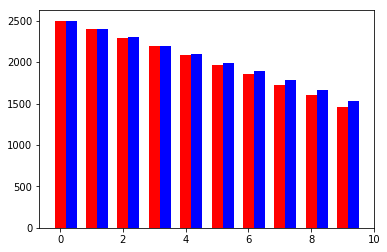

In [31]:
compare_viz()

In [1]:
import seaborn as sns

In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [7]:
flights1 = sns.load_dataset("flights")
flights = flights1.pivot("month", "year", "passengers")

In [8]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [9]:
flights1

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119
